In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from scipy.stats import norm

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?
This hotel booking dataset can help you explore those questions!

Data downloaded from : https://www.kaggle.com/jessemostipak/hotel-booking-demand

Extra information could be found in here : https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=2ED0AFB71A347CA466F7DBDCF4478D3D849BA24EE0F93DAB84161E4D7E40266946A2CF564CAEDE9F81FE977A6AA67553&originRegion=eu-west-1&originCreation=20211226144110

In [2]:
dir_path = '/home/mahdi/python3_files/datasets'
file_name = 'hotel_bookings.csv'
hotel_bookings = pd.read_csv(f'{dir_path}/{file_name}')

----------------------

First of all let's try to cleanse our data, some columns are not necessary, so we will get rid of them, or merge them together:

In [3]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_numbers = np.arange(1,13)

In [4]:
new_month_list = []
for k in hotel_bookings.arrival_date_month:
    for i,j in np.ndenumerate(months):
        if k == j:
            new_month_list.append(i[0]+1)    

hotel_bookings['arrival_month_number'] = new_month_list    #conversion from months' names to months' numbers

In [5]:
arrival_date = []
for g in hotel_bookings[['arrival_date_year', 'arrival_month_number', 'arrival_date_day_of_month']].values:
    arrival_date.append(dt.date(g[0], g[1], g[2]))

hotel_bookings['arrival_date'] = arrival_date    #a new datetime column from three attributes (year, month, day) in the table
hotel_bookings['arrival_date'] = pd.to_datetime(hotel_bookings.arrival_date)  #converted to datetime format

In [6]:
hotel_bookings.rename(columns = {'adr':'average_daily_rate', 'agent':'agent_id', 'company':'company_id'} ,inplace = True)

In [7]:
hotel_bookings = hotel_bookings[['hotel', 'is_canceled', 'lead_time', 'arrival_date', 'reservation_status_date', 'reservation_status', 
                'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
                'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type',
                'assigned_room_type', 'booking_changes', 'deposit_type', 'agent_id', 'company_id', 'days_in_waiting_list', 'customer_type', 'average_daily_rate',
                'required_car_parking_spaces', 'total_of_special_requests']]

In [3]:
#hotel_bookings.to_csv('hotel_booking_cleaned.csv')  #saving the dataset
#hotel_bookings = pd.read_csv('hotel_booking_cleaned.csv')  #load the clean data

-----------------

After cleansing the data, we're going to analyse its important attributes:

So for the first step, let's see when did the passengers book a room:

In [8]:
len_lead_time = hotel_bookings.lead_time.count()
Booked_days_ago = {
'more than 1 year ago' : [hotel_bookings[hotel_bookings.lead_time > 365].lead_time.count(), round(hotel_bookings[hotel_bookings.lead_time > 365].lead_time.count()/len_lead_time * 100, 2)],
'less than 1 year ago' : [hotel_bookings[hotel_bookings.lead_time < 365].lead_time.count(), round(hotel_bookings[hotel_bookings.lead_time < 365].lead_time.count()/len_lead_time * 100, 2)],
'less than half a year ago' : [hotel_bookings[hotel_bookings.lead_time < 182].lead_time.count(), round(hotel_bookings[hotel_bookings.lead_time < 182].lead_time.count()/len_lead_time * 100, 2)],
'less than 30 days ago' : [hotel_bookings[hotel_bookings.lead_time <= 31].lead_time.count(), round(hotel_bookings[hotel_bookings.lead_time <= 31].lead_time.count()/len_lead_time * 100, 2)],
'less than 7 days ago' : [hotel_bookings[hotel_bookings.lead_time <= 7].lead_time.count(), round(hotel_bookings[hotel_bookings.lead_time <= 7].lead_time.count()/len_lead_time * 100, 2)],
'Day of arrival ago' : [hotel_bookings[hotel_bookings.lead_time ==0].lead_time.count(), round(hotel_bookings[hotel_bookings.lead_time ==0].lead_time.count()/len_lead_time * 100, 2)]
}

In [9]:
booked_df = pd.DataFrame(Booked_days_ago).T
booked_df = booked_df.reset_index()
booked_df.columns = ['Booked', 'Number_of_passengers', 'Percentage']

In [10]:
booked_df

,Booked,Number_of_passengers,Percentage
0,more than 1 year ago,3148.0,2.64
1,less than 1 year ago,116177.0,97.31
2,less than half a year ago,94993.0,79.57
3,less than 30 days ago,39391.0,32.99
4,less than 7 days ago,19746.0,16.54
5,Day of arrival ago,6345.0,5.31


Based on the table above, it's quite easy to say that more have booked their rooms that very year(97.31), which means the timedelta is mostly less than 365 days. And only 2.65 percent of the passengers have booked more than a one year period.
79.57 percent of the passengers booked in half a year (approx. 182 days), so let's just assume more of the passegers might book a room in advance in 6 months before their arrival. And 5 percent of them booked the day of their arrival.

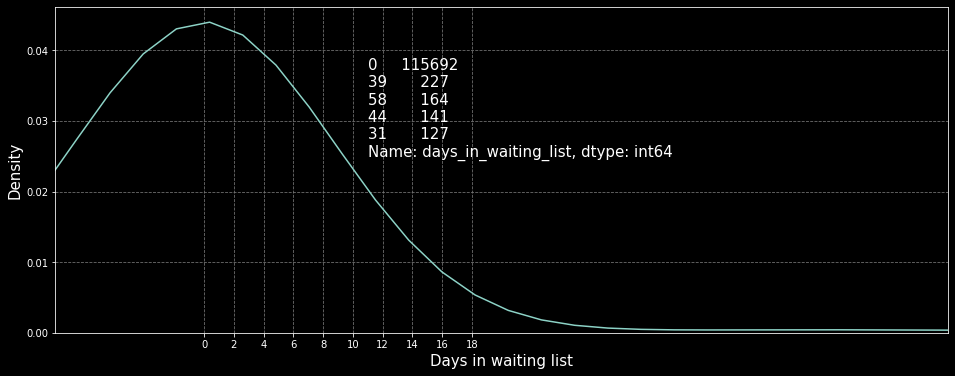

In [132]:
plt.style.use('dark_background')
fig0, ax0 = plt.subplots(figsize=(16,6))
sns.kdeplot(hotel_bookings.days_in_waiting_list, bw_method=0.5);
ax0.set_xlabel('Days in waiting list', size=15)
ax0.set_ylabel('Density', size=15)
ax0.text(11, 0.025, f'{hotel_bookings.days_in_waiting_list.value_counts().head(5)}', size=15)
plt.grid(color='#737373', linestyle='dashed')
plt.xticks(np.arange(0, 20, 2));
ax0.set_xlim(-10, 50);

After we analysed the duration between the booking date and their arrival date, then it was time to see numbers of days guests waited in the waitinglist to be confirmed by the system. So based on the density plot above, most of the guests, over 115 thousand of them got confirmed that day (without waiting for days), and mostly waited for at most 5 days and the minority had to wait for a period of approx. 40 days. This is partly because the hotel had no vacancy for that period of time.

Let's see if the waiting was due to lots of requests made during the busiest time of year:

In [224]:
lead_time_date = []
for i in range(hotel_bookings.hotel.count()):
    lead_time_date.append(hotel_bookings.arrival_date[i] - dt.timedelta(days = int(hotel_bookings.lead_time[i])))

In [225]:
hotel_bookings['lead_time_date'] = lead_time_date

In [242]:
busy_months = pd.DataFrame(hotel_bookings[(hotel_bookings.days_in_waiting_list > 0)].groupby(hotel_bookings.lead_time_date.dt.month).hotel.count().sort_values(ascending=False).head(5))
busy_months.reset_index(inplace=True)
busy_months.columns = ['Busiest months', 'Frequency']
busy_months

,Busiest months,Frequency
0,11,828
1,12,718
2,8,664
3,7,641
4,10,381


Yes the waitings mostly related to the busiest months such as November and December (for Christmas), and July and August for summer time. So for busiest time of the year, you have to wait for some days or even months before you get confirmed by the system.

Now we're going to figure out how many of the passengers did cancel their bookings:

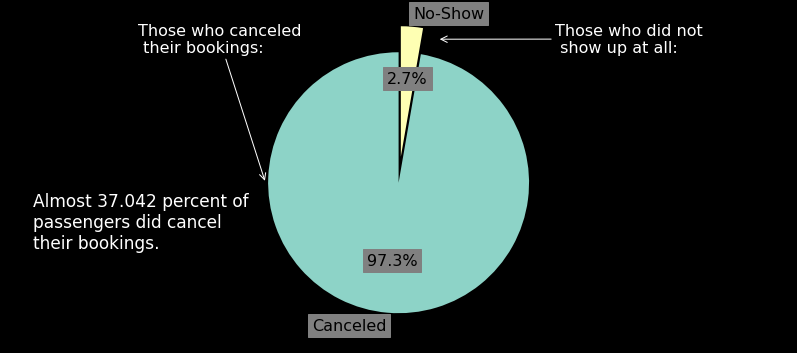

In [11]:
plt.style.use('dark_background')
fig1, ax1 = plt.subplots(figsize=(17,6))
labels = ['Canceled', 'No-Show']
explode = (0, 0.2)
ax1.pie(hotel_bookings[(hotel_bookings.is_canceled == 1)].groupby('reservation_status').is_canceled.count(), explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90, textprops={'size':16, 'color':'black', 'backgroundcolor':'grey'})

#a = round(hotel_bookings[(hotel_bookings.is_canceled == 1) & (hotel_bookings.reservation_status == 'Canceled') & ((hotel_bookings.stays_in_week_nights !=0) | (hotel_bookings.stays_in_weekend_nights !=0))].is_canceled.count() / hotel_bookings[(hotel_bookings.is_canceled == 1) & (hotel_bookings.reservation_status == 'Canceled')].is_canceled.count() * 100, 3)
#b = round(hotel_bookings[(hotel_bookings.is_canceled == 1) & (hotel_bookings.reservation_status == 'Canceled') & ((hotel_bookings.stays_in_week_nights ==0) & (hotel_bookings.stays_in_weekend_nights ==0))].is_canceled.count() / hotel_bookings[(hotel_bookings.is_canceled == 1) & (hotel_bookings.reservation_status == 'Canceled')].is_canceled.count() * 100, 3)
ax1.annotate(f'Those who canceled\n their bookings:',
             xy=(-1.02, 0), xytext=(-2, 1.0), size=16, arrowprops={'arrowstyle':'->', 'linewidth':1}, color='white')

#c = round(hotel_bookings[(hotel_bookings.is_canceled == 1) & (hotel_bookings.reservation_status == 'No-Show') & ((hotel_bookings.stays_in_week_nights !=0) | (hotel_bookings.stays_in_weekend_nights !=0))].is_canceled.count() / hotel_bookings[(hotel_bookings.is_canceled == 1) & (hotel_bookings.reservation_status == 'No-Show')].is_canceled.count() * 100, 3)
#d = round(hotel_bookings[(hotel_bookings.is_canceled == 1) & (hotel_bookings.reservation_status == 'No-Show') & ((hotel_bookings.stays_in_week_nights ==0) & (hotel_bookings.stays_in_weekend_nights ==0))].is_canceled.count() / hotel_bookings[(hotel_bookings.is_canceled == 1) & (hotel_bookings.reservation_status == 'No-Show')].is_canceled.count() * 100, 3)
ax1.annotate(f'Those who did not\n show up at all:',
             xy=(.3, 1.1), xytext=(1.2, 1), size=16, arrowprops={'arrowstyle':'->', 'linewidth':1}, color='white')

e = round(hotel_bookings[hotel_bookings.is_canceled == 1].is_canceled.count() / hotel_bookings.is_canceled.count() * 100, 3)
ax1.text(-2.8, -.5 , f'Almost {e} percent of \npassengers did cancel\ntheir bookings.', size=17)

ax1.set_xlim(-3,3)
coord = ax1.get_xlim(), ax1.get_ylim()
plt.xticks(rotation=70);

As mentioned in the chart above, 37 percent of the passengers did cancel their bookings. These cancelations could be due to several reasons.
The chart also illustrates that nearly all of the passengers (97.3 percent) did register their cancelation, this is while 2.7 percent of the passengers didn't even show up at all, but did inform the hotel of the reason why.

So for now we want to see how many days and nights did the passengers stay at the hotel:

In [11]:
stay_week_nights_pdf = norm.pdf(hotel_bookings.stays_in_week_nights.sort_values(ascending=False), hotel_bookings.stays_in_week_nights.mean(), hotel_bookings.stays_in_week_nights.std())
stay_weekend_nights_pdf = norm.pdf(hotel_bookings.stays_in_weekend_nights.sort_values(ascending=False), hotel_bookings.stays_in_weekend_nights.mean(), hotel_bookings.stays_in_weekend_nights.std())

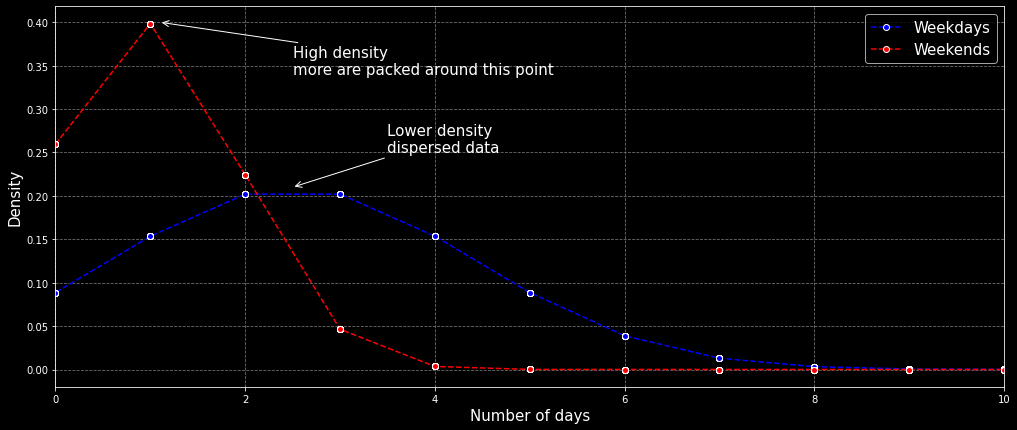

In [13]:
plt.style.use('dark_background')
fig2, ax2 = plt.subplots(figsize=(17,7))
ax2.set_xlabel('Number of days', size=15)
ax2.set_ylabel('Density', size=15)
ax2.plot(hotel_bookings.stays_in_week_nights.sort_values(ascending=False), stay_week_nights_pdf, color='blue', mec='white', marker='o', linestyle='--', label='Weekdays')
ax2.plot(hotel_bookings.stays_in_weekend_nights.sort_values(ascending=False), stay_weekend_nights_pdf, color='red', mec='white', marker='o', linestyle='--', label='Weekends')
ax2.set_xlim(0,10);
ax2.legend(fontsize=15)
ax2.annotate('High density\nmore are packed around this point', xy=(1.1, .4), xytext=(2.5, .34),  
             arrowprops={'arrowstyle':'->', 'linewidth':1}, size=15)
ax2.annotate('Lower density\ndispersed data', xy=(2.5, .21), xytext=(3.5, .25),  
             arrowprops={'arrowstyle':'->', 'linewidth':1}, size=15)
plt.grid(color='#737373', linestyle='dashed')
#plt.xticks(rotation=70);

In [12]:
x = hotel_bookings[(hotel_bookings.stays_in_weekend_nights != 0) & (hotel_bookings.stays_in_weekend_nights <=2)].hotel.count() / hotel_bookings.hotel.count() * 100
y = hotel_bookings[(hotel_bookings.stays_in_weekend_nights > 2)].hotel.count() / hotel_bookings.hotel.count() * 100
columns = ['x', 'y']
stay_weekends = pd.DataFrame({'Saturdays or Sundays':[x], 'more than 2 days at the weekends':[y]}).T.reset_index()
stay_weekends.columns = ['stays_in_weekend_nights', 'Guests(percentage)']
stay_weekends

,stays_in_weekend_nights,Guests(percentage)
0,Saturdays or Sundays,53.550549
1,more than 2 days at the weekends,2.896390


For analysis we used pdf(probability density function) to analysize the weekdays and weekends guests stayed at the hotel. The red line show number of weekends each guest stayed there. It shows that there is a high probability that most guests did stay at the hotel for at most 2 days at the weekends - Saturday and Sunday (apart from weekdays), and it means that they mostly stayed there for one to two days at the weekends and that's 53.5 of the guests.

In [13]:
z = hotel_bookings[(hotel_bookings.stays_in_week_nights >= 1) & ((hotel_bookings.stays_in_week_nights <= 6))].hotel.count() / hotel_bookings.hotel.count() * 100
k = hotel_bookings[(hotel_bookings.stays_in_week_nights > 6)].hotel.count() / hotel_bookings.hotel.count() * 100
columns = ['z', 'k']
stay_weekdays = pd.DataFrame({'Mondays to Fridays':[z], 'more on weekdays':[k]}).T.reset_index()
stay_weekdays.columns = ['stays_in_week_nights', 'Guests(percentage)']
stay_weekdays

,stays_in_week_nights,Guests(percentage)
0,Mondays to Fridays,90.787336
1,more on weekdays,2.809281


And for weekdays, 90 percent of the guests did stay at the hotels from Mondays to Fridays. The pdf of weekends is much higher than weekdays and obviously that is because of the variety of weekdays compared to weekends.
Let's see the if the hotels are crowded at the weekends or not:

In [14]:
print('Weekends: ', hotel_bookings[(hotel_bookings.stays_in_weekend_nights != 0)].hotel.count() / hotel_bookings.hotel.count() * 100)
print('Weekdays: ', hotel_bookings[(hotel_bookings.stays_in_week_nights != 0)].hotel.count() / hotel_bookings.hotel.count() * 100)

Weekends:  56.44693860457325
Weekdays:  93.59661613200436


So it turned out that more than 90 percent did spent at the weekdays and nearly 60 percent of them stayed at the weekends.

The next attribute is the number of adults, childern and babies:

In [17]:
partners = hotel_bookings[hotel_bookings.adults == 2].hotel.count() / hotel_bookings.hotel.count() * 100
couples_with_children = hotel_bookings[(hotel_bookings.adults == 2) & ((hotel_bookings.children != 0) | (hotel_bookings.babies !=0))].hotel.count() / hotel_bookings.hotel.count() * 100
alone_guests = hotel_bookings[(hotel_bookings.adults == 1)].hotel.count() / hotel_bookings.hotel.count() * 100
couple_with_children_or_individuals = pd.DataFrame({'only partners':[partners], 'individuals':[alone_guests], 'couples with children':[couples_with_children]}).T.reset_index()
couple_with_children_or_individuals.columns = ['Groups', 'Guests(percentage)']

In [18]:
couple_with_children_or_individuals

,Groups,Guests(percentage)
0,only partners,75.115169
1,individuals,19.287210
2,couples with children,6.803752


As summarized in the table above, most of the guests, over 75 percent of them, are just couples, partners, or friends (two of them). The next top group is individuals with 19 percent. And the last one is considered couples with children with more than 6 percent.

We now have traveleres coming from all around the world:

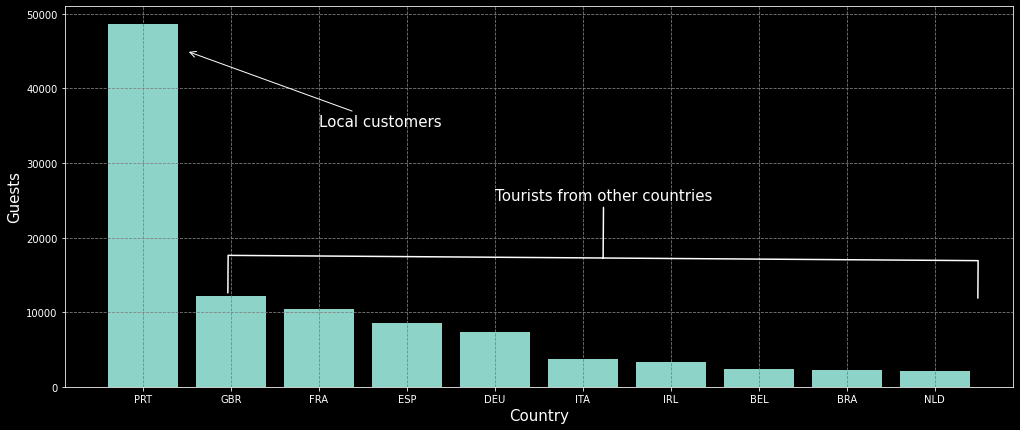

In [135]:
plt.style.use('dark_background')
fig3, ax3 = plt.subplots(figsize=(17,7))
ax3.bar(hotel_bookings.country.value_counts().head(10).index, hotel_bookings.country.value_counts().head(10))
ax3.set_xlabel('Country', size=15)
ax3.set_ylabel('Guests', size=15)
ax3.annotate(text='Local customers', xy=(.5, 45000), xytext=(2, 35000), arrowprops={'arrowstyle':'->', 'linewidth':1}, size=15)
ax3.annotate(text='Tourists from other countries', xy=(5.23, 17000), xytext=(4, 25000), arrowprops={'arrowstyle':'-[, widthB=25, lengthB=2.5', 'linewidth':1.5}, size=15)
ax3.grid(color='grey', linestyle='dashed')

Top countries with the most tourists who book these two hotels are Portugal (local customers) with more than 45000 tourists, England with over 10000 guests, France, Espain and so on. The huge difference is due to the fact that the hotels are located in Portugal.

There are 4 types of customers:

In [153]:
customer_type = pd.DataFrame(data=hotel_bookings.customer_type.value_counts()).reset_index()
customer_type.columns = ['Customer type', 'Frequency']
customer_type['Percentage'] = round(customer_type.Frequency * 100 / hotel_bookings.customer_type.count(), 2)
customer_type

,Customer type,Frequency,Percentage
0,Transient,89613,75.06
1,Transient-Party,25124,21.04
2,Contract,4076,3.41
3,Group,577,0.48


Next attribute is the type of customers. Among these types, the first group of customers are transient that account for 75 percent of all customers, meaning when the booking is not part of a group or contract, and is not associated to other transient booking; The next group is the Transient party with 21 percent and that is when the booking is transient, but is associated to at least other transient booking.

Now let's see if the customers payed a deposit for their bookings:

In [124]:
pd.DataFrame(data={'Frequency': hotel_bookings.deposit_type.value_counts(), 'Percentage': hotel_bookings.deposit_type.value_counts().values / hotel_bookings.hotel.count() * 100})

,Frequency,Percentage
No Deposit,104641,87.646369
Non Refund,14587,12.217941
Refundable,162,0.135690


Most of the customers (more than 87 percent) did not pay a deposit for their booking, which means no payments were found. Nearly 14000 of them (over 12 percent) did payed the total cost of stay to guarantee their bookings and a few of the customers only payed a deposit of less than their booking price.

In [74]:
pd.DataFrame(data={'market segmentation frequency': hotel_bookings.market_segment.value_counts(), 'Percentage': hotel_bookings.market_segment.value_counts() / hotel_bookings.hotel.count() * 100})

,market segmentation frequency,Percentage
Online TA,56477,47.304632
Offline TA/TO,24219,20.285619
Groups,19811,16.593517
Direct,12606,10.558673
Corporate,5295,4.435045
Complementary,743,0.622330
Aviation,237,0.198509
Undefined,2,0.001675


Regarding the table above it's obvious that travel agencies account for over 60 percent of hotel bookings, and the next is group bookings with 16 percent. And merely 10 percent of the customers did book a hotel directly.

In [11]:
guest_by_hotels = pd.DataFrame(hotel_bookings.groupby(hotel_bookings.hotel).hotel.count())
guest_by_hotels['is_repeated'] = hotel_bookings[hotel_bookings.is_repeated_guest == 1].groupby(hotel_bookings.hotel).is_repeated_guest.count().values
guest_by_hotels['percentage'] = round(guest_by_hotels.is_repeated / guest_by_hotels.hotel * 100, 3).values
guest_by_hotels.columns = ['customers', 'is_repeated', 'percentage']
guest_by_hotels.loc['Total'] = [hotel_bookings.hotel.count(), hotel_bookings[hotel_bookings.is_repeated_guest == 1].hotel.count(), hotel_bookings[hotel_bookings.is_repeated_guest == 1].hotel.count() / hotel_bookings.hotel.count() * 100]
guest_by_hotels

,customers,is_repeated,percentage
hotel,,,
City Hotel,79330.0,2032.0,2.561000
Resort Hotel,40060.0,1778.0,4.438000
Total,119390.0,3810.0,3.191222


As you see 3 precent of customers were repeated guests. Customers from City Hotel are twice the number of those from Resort Hotel, and for City Hotel more than 2 percent of them were repeated guests while for Resort Hotel over 4 percent of the customers chose the hotel more than once. You can take a look at the bar plots below related to the number of customers.

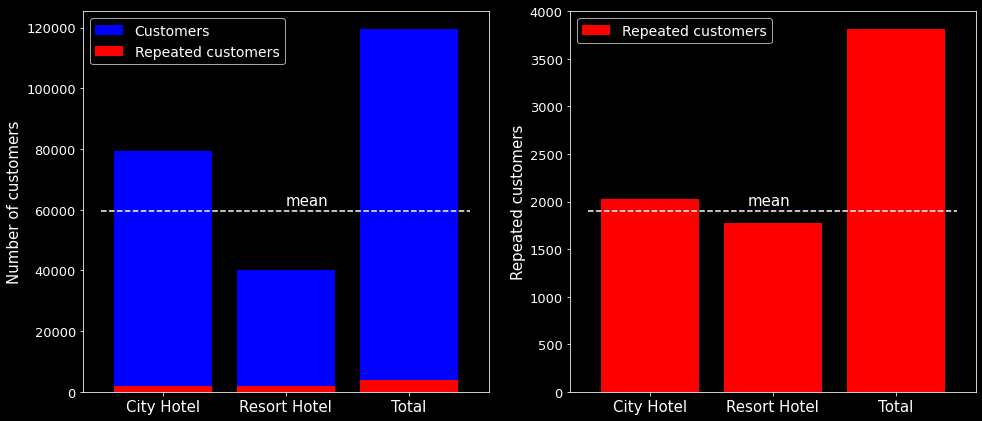

In [68]:
plt.style.use('dark_background')
fig4, ax4 = plt.subplots(1, 2, figsize=(16,7))
ax4[0].bar(guest_by_hotels.index, guest_by_hotels.customers, color='blue', label='Customers');
ax4[0].bar(guest_by_hotels.index, guest_by_hotels.is_repeated, color='red', label='Repeated customers');
ax4[1].bar(guest_by_hotels.index, guest_by_hotels.is_repeated, color='red', label='Repeated customers');
ax4[0].plot((-.5, 2.5), (59695, 59695), color='white', linestyle='dashed')
ax4[1].plot((-.5, 2.5), (1905, 1905), color='white', linestyle='dashed')
ax4[0].text(1, 61500, 'mean', size=15)
ax4[1].text(.8, 1960, 'mean', size=15)
ax4[0].set_ylabel('Number of customers', size=15)
ax4[1].set_ylabel('Repeated customers', size=15)
ax4[0].legend(fontsize=14)
ax4[1].legend(fontsize=14)
plt.sca(ax4[0])
plt.xticks(size=15);
plt.yticks(size=13);
plt.sca(ax4[1])
plt.xticks(size=15);
plt.yticks(size=13);

Note that if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest.

In [150]:
hotels_cancelation = {
'City Hotel' :   [round(hotel_bookings[(hotel_bookings.hotel == 'City Hotel') & (hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.previous_cancellations != 0)].hotel.count() / hotel_bookings[(hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.hotel == 'City Hotel')].hotel.count() * 100, 3), 
                  round(hotel_bookings[(hotel_bookings.hotel == 'City Hotel') & (hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.previous_bookings_not_canceled != 0)].hotel.count() / hotel_bookings[(hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.hotel == 'City Hotel')].hotel.count() * 100, 3)],
'Resort Hotel' : [round(hotel_bookings[(hotel_bookings.hotel == 'Resort Hotel') & (hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.previous_cancellations != 0)].hotel.count() / hotel_bookings[(hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.hotel == 'Resort Hotel')].hotel.count() * 100, 3), 
                  round(hotel_bookings[(hotel_bookings.hotel == 'Resort Hotel') & (hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.previous_bookings_not_canceled != 0)].hotel.count() / hotel_bookings[(hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.hotel == 'Resort Hotel')].hotel.count() * 100, 3)],
'total':         [round(hotel_bookings[(hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.previous_cancellations != 0)].hotel.count() / hotel_bookings[(hotel_bookings.is_repeated_guest == 1)].hotel.count() * 100, 3), 
                  round(hotel_bookings[(hotel_bookings.is_repeated_guest == 1) & (hotel_bookings.previous_bookings_not_canceled != 0)].hotel.count() / hotel_bookings[(hotel_bookings.is_repeated_guest == 1)].hotel.count() * 100, 3)]
}
micolumns = pd.MultiIndex.from_tuples(
    [("repeated guests", "previous cancellations %"), ("repeated guests", "previous bookings not canceled")]
)
hotels_cancelation_df = pd.DataFrame(hotels_cancelation).T
hotels_cancelation_df.columns = micolumns

In [151]:
hotels_cancelation_df

repeated guests                               
             previous cancellations % previous bookings not canceled
City Hotel                     36.516                         69.636
Resort Hotel                   10.405                         80.034
total                          24.331                         74.488

The tale above demonstrates that among the repeated guests, 24 percent of them had previous cancellations and 74 percent of them had no previous canceled bookings. City hotel's guests had more previous cancellations and Resort hotel had more previous bookings not canceled.

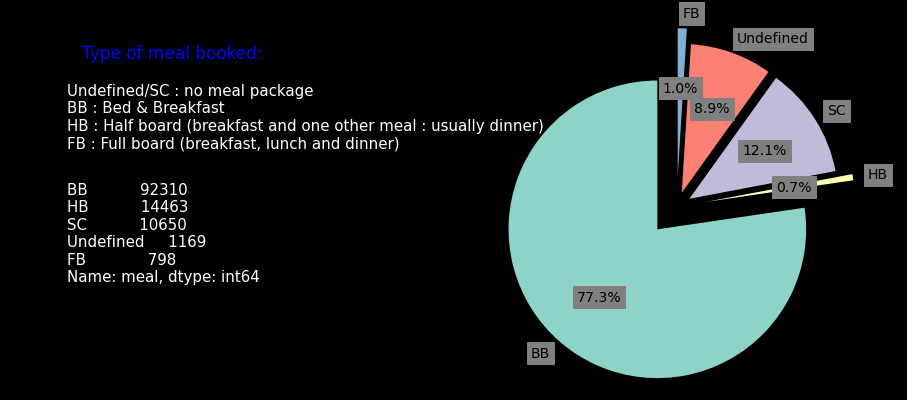

In [160]:
plt.style.use('dark_background')
fig5, ax5 = plt.subplots(figsize=(16,7))
labels = ['BB', 'HB', 'SC', 'Undefined', 'FB'];
explode = (0.2, 0.2, 0.1, 0.1, 0.2)
ax5.pie(hotel_bookings.groupby('meal').hotel.count(), labels=labels, autopct='%1.1f%%', explode=explode,
        startangle=90, textprops={'size':14, 'color':'black', 'backgroundcolor':'grey'});

ax5.text(-4, 1, 'Type of meal booked:', size=17, color='blue')
ax5.text(-4.1, .4, 'Undefined/SC : no meal package\nBB : Bed & Breakfast\nHB : Half board (breakfast and one other meal : usually dinner)\nFB : Full board (breakfast, lunch and dinner)', size=15)
ax5.text(-4.1, -.5, f'{hotel_bookings.meal.value_counts()}', size=15)
ax5.set_xlim(-4.5, 1.5);

The next feature is meal which is described in a pie chart above. As you see over 70 percent of the booked meals are bed and breakfast, meaning overnight accommodation and breakfast. The next group with more than 20 percent did not have any meal packages. And the minority of customers with less than 2 percent ordered half board or full board packages.

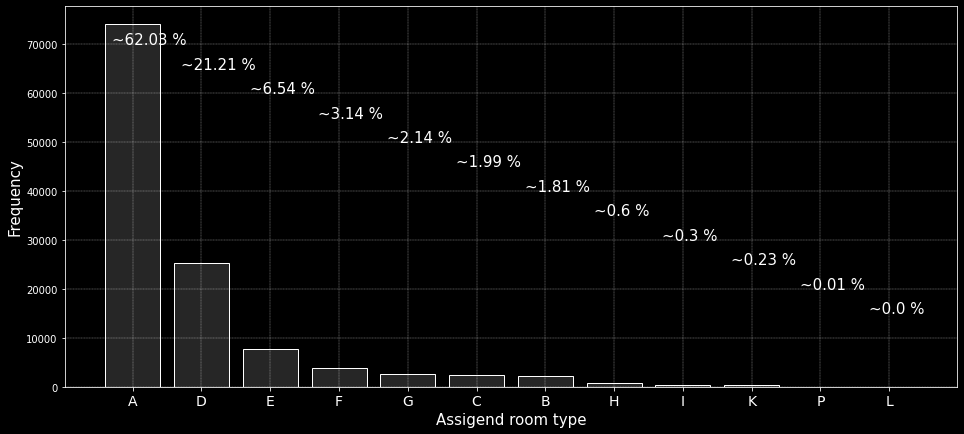

In [11]:
plt.style.use('dark_background')
fig5_2, ax5_2 = plt.subplots(figsize=(16,7))
ax5_2.bar(hotel_bookings.assigned_room_type.value_counts().keys(), hotel_bookings.assigned_room_type.value_counts().values, color='#262626', edgecolor='white')
ax5_2.set_xlabel('Assigend room type', size=15)
ax5_2.set_ylabel('Frequency', size=15)
ax5_2.grid(which='both', linestyle='dashed', lw=.3)    
plt.xticks(color='white', size=14)

j = 70000
for i in range(12):
    ax5_2.text(i-.3, j, f'~{(np.round(hotel_bookings.assigned_room_type.value_counts().values / hotel_bookings.hotel.count() * 100, 2))[i]} %', 
               size='15', color='white')
    j -= 5000

The most common type of assigned rooms are 'A' type with more than 62 percent. And the next one is 'D' type with over 21 percent and the rest of room types lie below 10 percent. Code is presented instead of designation for anonymity reasons.

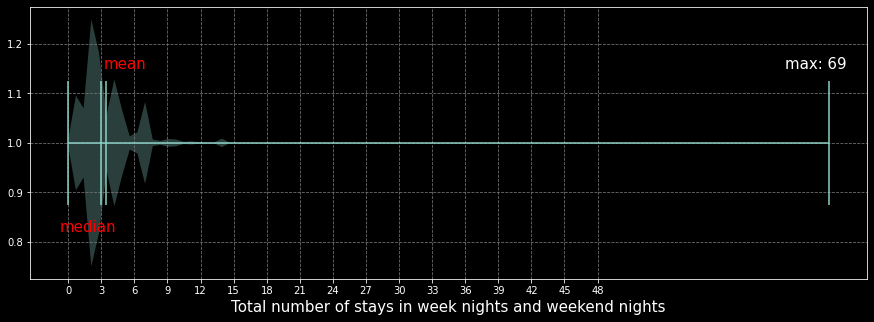

In [8]:
plt.style.use('dark_background')
fig6, ax6 = plt.subplots(figsize=(15,5))
ax6.violinplot((hotel_bookings.stays_in_week_nights + hotel_bookings.stays_in_weekend_nights), vert=False, showmeans=True, showmedians=True);
ax6.text(np.max(hotel_bookings.stays_in_week_nights + hotel_bookings.stays_in_weekend_nights) - 4, 1.15, f"max: {np.max(hotel_bookings.stays_in_week_nights + hotel_bookings.stays_in_weekend_nights)}", size=15);
ax6.text(3.2, 1.15, "mean", size=15, color='red');
ax6.text(-0.8, .82, "median", size=15, color='red');
ax6.set_xlabel('Total number of stays in week nights and weekend nights', size=15)
plt.xticks(np.arange(0, 50, 3));
ax6.grid(color='#737373', linestyle='dashed')

The violinplot above is about total number of days guests stay at the two hotels. The is a high density from 0 to 9, meaning the majority of the guests spent approximately 0 to 9 days. And the average days of stay is approximately 3 days. There are even customers with more than two months of stay, who are of course outliers.

-------------

In this part of the analysis, I want to figure out more about this dataset and figure out some cool stuff related to these two hotels:

In [76]:
top_customers = hotel_bookings[hotel_bookings.is_repeated_guest == 1][['previous_cancellations', 'previous_bookings_not_canceled', 'reservation_status', 'booking_changes', 'distribution_channel', 'agent_id', 'company_id']]
top_customers['total_bookings'] = top_customers.previous_bookings_not_canceled + top_customers.previous_cancellations
top_customers = top_customers[top_customers.total_bookings != 0]

In [77]:
discounts = []
for i in top_customers.total_bookings:
    interval = 80
    for k in np.arange(8,0, -1):
        flag = 0
        if i < interval and i >= (interval - 10):
                discounts.append(interval - 5)
                flag = 1
        if flag == 1:
            break
        else:
            interval -= 10
top_customers['discount'] = discounts            

In [78]:
top_customers.sort_values(by='total_bookings', ascending=False)

,previous_cancellations,previous_bookings_not_canceled,reservation_status,booking_changes,distribution_channel,agent_id,company_id,total_bookings,discount
76731,6,72,Check-Out,0,Corporate,NaN,40.0,78,75
76730,6,71,Check-Out,1,Corporate,NaN,40.0,77,75
76729,6,70,Check-Out,0,Corporate,NaN,40.0,76,75
76728,6,69,Check-Out,0,Corporate,NaN,40.0,75,75
76727,6,68,Check-Out,1,Corporate,NaN,40.0,74,75
...,...,...,...,...,...,...,...,...,...
32722,0,1,Check-Out,0,Corporate,NaN,390.0,1,5
32715,0,1,Check-Out,0,TA/TO,241.0,NaN,1,5
32712,0,1,Check-Out,0,Direct,250.0,NaN,1,5
32705,0,1,Check-Out,0,Direct,NaN,130.0,1,5


The table above shows the repeated guests from 1 to 78 previous bookings (they could be of a corporation). The top customers should get the best possible offers set by the hotels principals.
So I made a discount attribute and tried to group customers into different discount groups. So the first top group would get 75 percent off and the last group only 5 percent.

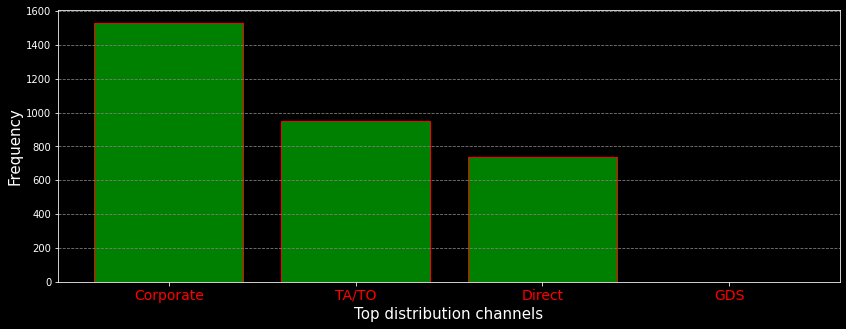

In [145]:
plt.style.use('dark_background')
fig7, ax7 = plt.subplots(figsize=(14,5))
ax7.bar(top_customers.distribution_channel.value_counts().keys(), top_customers.distribution_channel.value_counts().values, color='green', edgecolor='red');
ax7.set_xlabel('Top distribution channels', size=15);
ax7.set_ylabel('Frequency', size=15)
plt.xticks(size=14, color='red')
ax7.grid(axis='y', linestyle='dashed', color='grey')

Among top customers (as defined above), the top distribution channel is the corporate bookings with more than 1500 bookings, and the next two channels are travel agencies and direct bookings by customers with approx 1000 and 700 bookings.

For the last step we are going to see which time of the year could be the best to book a room into these hotels:

In [14]:
c=0
entering_date = []
for i in hotel_bookings[['arrival_date', 'lead_time']].values:
    entering_date.append(i[0] - dt.timedelta(days=i[1]))
    
hotel_bookings['entering_date'] = entering_date

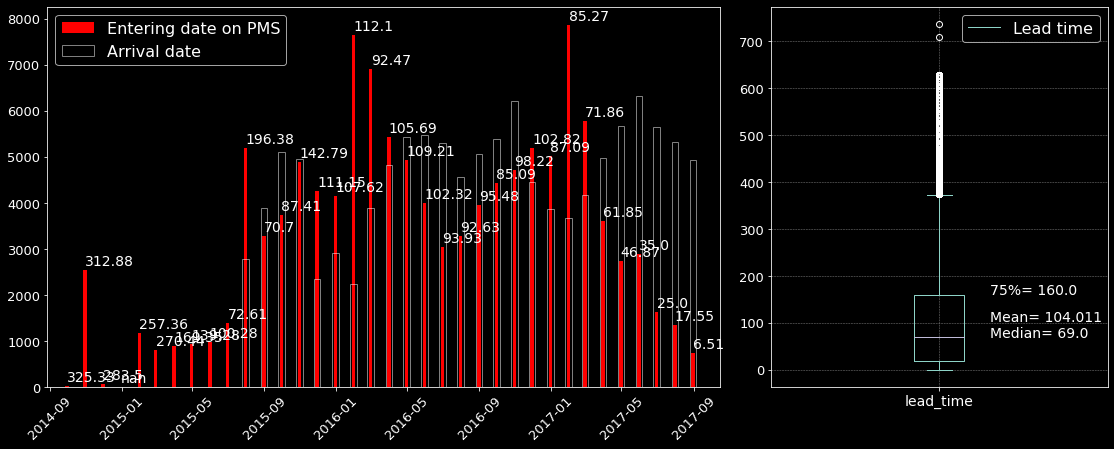

In [26]:
plt.style.use('dark_background')

fig8 = plt.figure()
#fig8, ax8 = plt.subplots(1,2)
fig8.set_figheight(7)
fig8.set_figwidth(19)
spec = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.1, hspace=0.5)

ax8[0] = fig8.add_subplot(spec[0])
ax8[0].bar(hotel_bookings.resample(rule='M', on='entering_date').hotel.count().index, hotel_bookings.resample(rule='M', on='entering_date').hotel.count().values, color='red', width=6, label='Entering date on PMS')

for i,k,j in zip(hotel_bookings[hotel_bookings.entering_date > dt.datetime(2014,9,1)].resample(rule='M', on='entering_date').lead_time.mean().index, 
                 hotel_bookings[hotel_bookings.entering_date > dt.datetime(2014,9,1)].resample(rule='M', on='entering_date').lead_time.count(), 
                 hotel_bookings[hotel_bookings.entering_date > dt.datetime(2014,9,1)].resample(rule='M', on='entering_date').lead_time.mean().values):
    ax8[0].text(i, k+100, f'{np.round(j, 2)}', size=14)
    
ax8[0].bar(hotel_bookings.resample(rule='M', on='arrival_date').hotel.count().index, hotel_bookings.resample(rule='M', on='arrival_date').hotel.count().values, color='None', edgecolor='white', width=11, alpha=.5, label='Arrival date')
ax8[0].set_xlim(16309.41, 17455.589999999997)
ax8[0].legend(loc='upper left', fontsize=16)
plt.sca(ax8[0]);
plt.xticks(rotation=45, size=13);
plt.yticks(size=13);

ax8[1] = fig8.add_subplot(spec[1])
hotel_bookings.lead_time.plot(ax=ax8[1], kind='box', legend=True)
ax8[1].text(1.15, hotel_bookings.lead_time.quantile(0.5), f'Median= {hotel_bookings.lead_time.quantile(0.5)}', size=14)
ax8[1].text(1.15, hotel_bookings.lead_time.mean(), f'Mean= {np.round(hotel_bookings.lead_time.mean(), 3)}', size=14)
ax8[1].text(1.15, hotel_bookings.lead_time.quantile(0.75), f'75%= {np.round(hotel_bookings.lead_time.quantile(0.75), 3)}', size=14)

ax8[1].legend(fontsize=16, labels=['Lead time']);
ax8[1].grid(linestyle='dashed', color='grey', linewidth=.5)
plt.sca(ax8[1]);
plt.xticks(size=14);
plt.yticks(size=13);

The barplot above compares the number of bookings entered into the PMS system to the number of arrivals from October 2014 to January 2017.
The red bars are the number of bookings entered into the system in each month and the empty white lines are the number of arrivals in that very month. 
The boxplot at the right had side shows the lead time, which is the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
It says that on average customers booked a room 104 days prior to their arrival date. So if you want to get there you'd better book a room in advance from at least 160 days before your your destined arrival date. 
We also have to pay attention to the bussiest months of the year such as 11, 12, 7, which might even take a bit longer to be accepted by the system.

So a simple analysis according to the barplot above would be, in months such Feb of 2016 and 2017 had the most customers who entered on PMS, but let's take a look at frames below to figure it out more precisely:

In [39]:
hotel_bookings.resample(rule='M', on='entering_date').entering_date.count().sort_values(ascending=False).head(6)

entering_date
2017-01-31    7869
2016-01-31    7654
2016-02-29    6897
2017-02-28    5772
2016-03-31    5429
2015-07-31    5196
Name: entering_date, dtype: int64

In [38]:
hotel_bookings.resample(rule='M', on='entering_date').lead_time.mean().sort_values(ascending=False)

entering_date
2013-06-30    737.000000
2014-03-31    709.000000
2014-04-30    478.000000
2014-06-30    381.000000
2014-07-31    357.333333
2014-08-31    345.000000
2014-09-30    325.333333
2014-10-31    312.882840
2014-11-30    283.500000
2015-02-28    270.439299
2015-01-31    257.362232
2015-07-31    196.383179
2015-03-31    169.345805
2015-10-31    142.791103
2015-04-30    139.282378
2016-01-31    112.102822
2015-11-30    111.153973
2016-04-30    109.211943
2015-12-31    107.624308
2016-03-31    105.693682
2016-11-30    102.821339
2016-05-31    102.318080
2015-05-31    100.280124
2016-10-31     98.220102
2016-08-31     95.478503
2016-06-30     93.926606
2016-07-31     92.629460
2016-02-29     92.473829
2015-09-30     87.407754
2016-12-31     87.089966
2017-01-31     85.269412
2016-09-30     85.091258
2015-06-30     72.609986
2017-02-28     71.861400
2015-08-31     70.701920
2017-03-31     61.852591
2017-04-30     46.865863
2017-05-31     34.997225
2017-06-30     24.999385
2017-07-31 

The top three most demanded months are 1st, 2nd, and 3rd of each year to book a room, and they booked it around 80 days before their arrival.

In [65]:
hotel_bookings[hotel_bookings.entering_date.dt.year.isin([2014, 2015, 2016])].groupby(hotel_bookings.entering_date.dt.month)['lead_time'].aggregate(['count', 'mean']).sort_values(by='mean', ascending=True)

,count,mean
entering_date,,
8,7240,84.422652
9,8185,86.678070
6,4436,87.415014
12,9168,96.396270
5,4970,101.919920
11,9505,107.843240
2,7696,110.950234
4,5886,114.275059
3,6312,114.683619


In [66]:
hotel_bookings[hotel_bookings.entering_date.dt.year.isin([2014, 2015, 2016])].groupby(hotel_bookings.entering_date.dt.month)['lead_time'].aggregate(['count', 'mean']).sort_values(by='count', ascending=True)

,count,mean
entering_date,,
6,4436,87.415014
5,4970,101.919920
4,5886,114.275059
3,6312,114.683619
8,7240,84.422652
2,7696,110.950234
9,8185,86.678070
7,8478,156.311748
1,8819,131.291756


So I chose the years 2014, 2015, and 2016 because we have their full months records. So it turned out that months such as 8 and 9 among all these years had the lowest lead time so these months could be a great choice for bookings.

And months such as 6 and 5 had the lowest rate of entering on the PMS so these months could be your options as well for booking.

In this mini project we tried to understand a little bit about the hotls' records from the time they entered on the PMS system to their arrival and finally to checking out. I tried to analyse the most important features and omitted the unnecessary ones.